# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q2, and one of Q1 or Q3.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2.1 - Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
# pip install xlrd
df = pd.read_excel("data/GSAF5.xls")
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [146]:
# 2.2 - Drop any columns that do not contain data.
df = df.dropna(axis = 'columns', how = 'all')
df.columns
# Nothing changed?

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [147]:
# 2.3 - Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
df = df[~df['Year'].isin([np.nan, 77., 5., 0,])]
df['Year'].unique()

array([2025., 2024., 2026., 2023., 2022., 2021., 2020., 2019., 2018.,
       2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010., 2009.,
       2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001., 2000.,
       1999., 1998., 1997., 1996., 1995., 1984., 1994., 1993., 1992.,
       1991., 1990., 1989., 1969., 1988., 1987., 1986., 1985., 1983.,
       1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975., 1974.,
       1973., 1972., 1971., 1970., 1968., 1967., 1966., 1965., 1964.,
       1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956., 1955.,
       1954., 1953., 1952., 1951., 1950., 1949., 1948., 1848., 1947.,
       1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939., 1938.,
       1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930., 1929.,
       1928., 1927., 1926., 1925., 1924., 1923., 1922., 1921., 1920.,
       1919., 1918., 1917., 1916., 1915., 1914., 1913., 1912., 1911.,
       1910., 1909., 1908., 1907., 1906., 1905., 1904., 1903., 1902.,
       1901., 1900.,

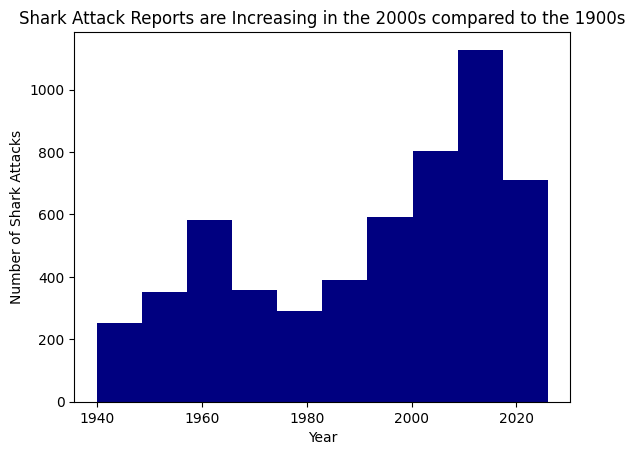

In [148]:
# The values range from 1000 to 2025
df = df[df['Year'] >= 1940]
df['Year'].unique()
plt.figure()
plt.hist(df['Year'], color = 'navy')
plt.xlabel("Year")
plt.ylabel("Number of Shark Attacks")
plt.title("Shark Attack Reports are Increasing in the 2000s compared to the 1900s")
plt.show()

In [149]:
# 2.4 - Clean the Age variable and make a histogram of the ages of the victims.
print(df['Age'].unique())
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df.dropna(subset = ['Age'])

[23 40 28 69 48 '60+' '?' 57 24 45 61 27 38 16 33 30 15 41 14 26
 'Middle age' 18 21 49 25 46 19 20 65 64 '13' nan '11' '46' '32' '29' '10'
 '64' '62' '39' '22' '15' '16' '21' '66' '52' '20' '44' '26' '47' '55'
 '30' '59' '8' '50' '45' '34' '38' '30s' '37' '9' '19' '20/30' '35' '65'
 '20s' '77' '60' '49' '42' '!2' '24' '73' '25' '18' '50s' '58' '67' '17'
 '14' '6' '41' '53' '68' '43' '40' '51' '31' 39 58 51 17 10 13 60 '40s' 68
 35 62 'teen' 8 22 32 56 'Teen' 12 42 36 37 50 'M' 9 11 34 '!6' 31 '!!' 47
 55 7 71 59 53 54 75 '45 and 15' 73 52 29 70 4 63 44 '28 & 22'
 '22, 57, 31' '60s' "20's" 43 67 74 '9 & 60' 'a minor' 6 3 82 66 72 '23'
 '12' '36' '63' '71' '48' '70' '18 months' '57' '7' '28' '33' '61' '74'
 '27' '3' '56' '28 & 26' '5' '54' '86' '18 or 20' '12 or 13' '46 & 34'
 '28, 23 & 30' 'Teens' 77 '36 & 26' '8 or 10' 84 '\xa0 ' ' ' '30 or 36'
 '6½' '21 & ?' '33 or 37' 'mid-30s' '23 & 20' 5 ' 30' '7      &    31'
 ' 28' '20?' "60's" '69' '32 & 30' '16 to 18' '87' 'Elderly' 'mid-20s'


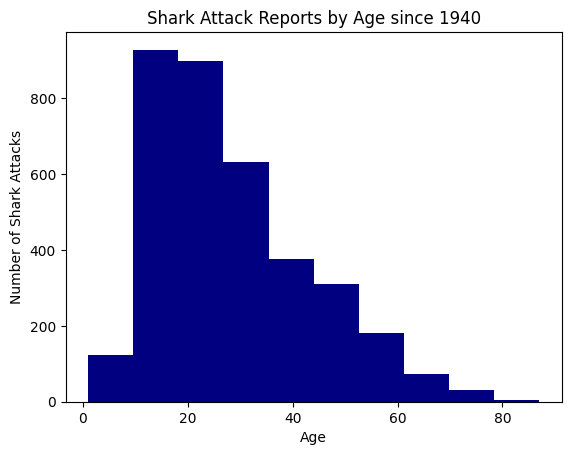

In [150]:
plt.figure()
plt.hist(df['Age'], color = 'navy')
plt.xlabel("Age")
plt.ylabel("Number of Shark Attacks")
plt.title("Shark Attack Reports by Age since 1940")
plt.show()

In [151]:
# 2.5 - What proportion of victims are male?
df['Sex'].value_counts()

Sex
M      2977
F       545
 M        1
M         1
lli       1
Name: count, dtype: int64

In [152]:
df['Sex'] = df['Sex'].str.strip()
df = df[df['Sex'].isin(["M", "F"])]
df['Sex'].value_counts()

print("The proportion of victims which are men is", round(sum(df['Sex'] == "M") / len(df), 3))

The proportion of victims which are men is 0.845


In [153]:
# 2.6 - Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
# Unknown?
print(df['Type'].value_counts(), "\n\n")
df['Type'] = df['Type'].apply(lambda x: x if x in ["Unprovoked", "Provoked"] else "Unknown")
print(df['Type'].value_counts(), "\n\n")

print("The proportion of attacks which are unprovoked is", round(sum(df['Type'] == "Unprovoked") / len(df), 3))

Type
Unprovoked             2933
Provoked                286
Invalid                 203
Watercraft               39
Sea Disaster             37
Questionable             15
?                         1
Under investigation       1
Name: count, dtype: int64 


Type
Unprovoked    2933
Unknown        305
Provoked       286
Name: count, dtype: int64 


The proportion of attacks which are unprovoked is 0.832


In [154]:
# 2.7 - Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
print(df['Fatal Y/N'].unique())
df = df.dropna(subset = ['Fatal Y/N'])
print(df['Fatal Y/N'].value_counts(), "\n\n")
df['Fatal Y/N'] = df['Fatal Y/N'].astype(str)
df['Fatal Y/N'] = df['Fatal Y/N'].str.strip()
print(df['Fatal Y/N'].value_counts(), "\n\n")
df['Fatal Y/N'] = df['Fatal Y/N'].apply(lambda x: x if x in ["Y", "N"] else "Unknown")
print(df['Fatal Y/N'].value_counts())

['N' 'Y' 'F' nan 'M' 2017 'UNKNOWN' ' N']
Fatal Y/N
N          2795
Y           511
UNKNOWN       7
 N            6
F             4
M             1
2017          1
Name: count, dtype: int64 


Fatal Y/N
N          2801
Y           511
UNKNOWN       7
F             4
M             1
2017          1
Name: count, dtype: int64 


Fatal Y/N
N          2801
Y           511
Unknown      13
Name: count, dtype: int64


In [155]:
# 2.8 - Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?

In [156]:
# 2.9 - What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?